## EDA for hobby

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data dir

data_dir = 'D:/thon/project/tourism/02.국민여가활동조사/3.데이터'

# data load

h21 = pd.read_csv(data_dir + '/hobby_21.csv')
h21 = pd.DataFrame(h21)

C:\Users\sujin\AppData\Local\Temp\ipykernel_13636\1857114713.py:7: DtypeWarning: Columns (90,100,101,102,103,104,105,126) have mixed types. Specify dtype option on import or set low_memory=False.
  h21 = pd.read_csv(data_dir + '/hobby_21.csv')


In [3]:
# 10049 rows with 356 columns

h21.shape

(10049, 356)

In [4]:
# 스포츠관람/참여 체크한 row만 추출 (sports_exp)

sports_exp = h21.loc[(h21['q1_C'] != '99') | (h21['q1_D'] != '99')]

print(len(sports_exp))

6826


In [5]:
# 의미있는 칼럼 리스트 생성
sports_col = ['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4', 'q1_D']

for i in range(17):
    sports_col.append('q1_D_m' + str(i+2))

sports_col.append('q6')
sports_col.append('q9')
sports_col.append('q11_1_C')
sports_col.append('q11_2_C')
sports_col.append('q11_1_D')
#sports_col.append('q11_2_D') # 평일 스포츠 여가 만족도 변수 의미 없는 것으로 판별
sports_col.append('q11_3_D')
sports_col.append('q12_1_C')
sports_col.append('q12_2_C')
sports_col.append('q12_1_D')
#sports_col.append('q12_2_D') # 휴일 스포츠 여가 만족도 변수 의미 없는 것으로 판별
sports_col.append('q12_3_D')

sports_col.append('q30')
sports_col.append('q30_1')

for i in range(5):
    sports_col.append('q35_' + str(i+1))

sports_col.append('q45')
sports_col.append('q45_1')
sports_col.append('q45_2')
sports_col.append('q47')

for i in range(12):
    sports_col.append('DM' + str(i+1))

print(len(sports_col))

55


In [6]:
# spotsman df에서 의미있는 칼럼 sports col만 추출
sports_exp_df = sports_exp[sports_col]

# 공백으로 차있는 값 대신 결측치 부여
sports_exp_df = sports_exp_df.convert_dtypes()
sports_exp_df = sports_exp_df.replace(" ", np.NaN) # 공백을 NA로 대체
print(sports_exp_df.head())
print('\n')
print(sports_exp_df.shape)

   q1_C q1_C_m2 q1_C_m3 q1_C_m4  q1_D q1_D_m2 q1_D_m3 q1_D_m4 q1_D_m5 q1_D_m6  \
4  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
5  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
6  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
8    99    <NA>    <NA>    <NA>  <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
9  <NA>      17    <NA>    <NA>  <NA>    <NA>      22    <NA>    <NA>    <NA>   

   ... DM3 DM4 DM5 DM6 DM7 DM8 DM9 DM10 DM11 DM12  
4  ...   3   2   1   1   5   2   3    5   15    3  
5  ...   1   2   3   1   5   2   3    5   15    3  
6  ...   2   3   2   1   5   3   3    5   15    3  
8  ...   1   1   3   1   8   1   3    5   15    3  
9  ...   3   2   2   2   6   3   3    5   15    3  

[5 rows x 55 columns]


(6826, 55)


In [7]:
# 스포츠관람활동 (직접관람, 간접관람, 격투관람, 온라인게임 관람)
sports_watch_col = ['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4']
sports_watch = sports_exp_df.shape[0] - sports_exp_df[sports_watch_col].isnull().sum()

# 경기 관람을 1회 이상 한 사람
sports_watch.index = ["경기관람", "간접관람", "격투관람", "이스포츠"]
sports_watch

경기관람    2396
간접관람    4742
격투관람     307
이스포츠     374
dtype: int64

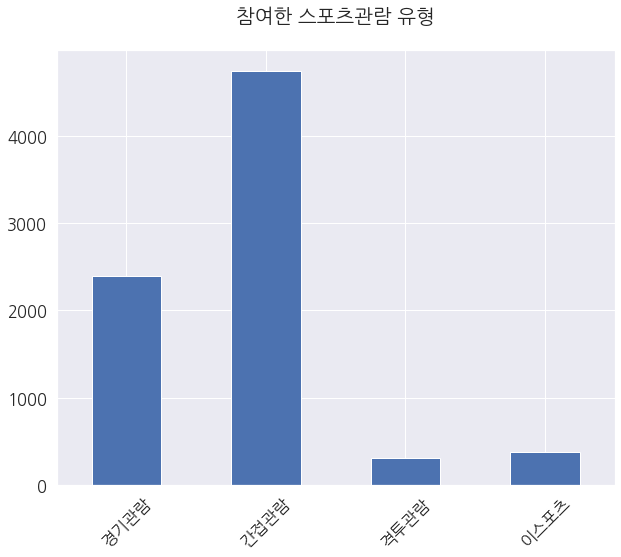

In [36]:
# 스포츠참여활동 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 8))
ax = sports_watch.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('참여한 스포츠관람 유형\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

### 간접관람의 빈도수가 가장 높았고, 직접관람의 빈도수도 2396명으로 적지 않았다.

In [8]:
# 스포츠참여활동 (18가지 카테고리)
sports_active_col = ['q1_D', 'q1_D_m2', 'q1_D_m3', 'q1_D_m4', 'q1_D_m5', 'q1_D_m6', 'q1_D_m7', 'q1_D_m8', 'q1_D_m9', 'q1_D_m10', 'q1_D_m11', 'q1_D_m12', 'q1_D_m13', 'q1_D_m14', 'q1_D_m15', 'q1_D_m16', 'q1_D_m17', 'q1_D_m18']
sports_active = sports_exp_df.shape[0] - sports_exp_df[sports_active_col].isnull().sum()

# 스포츠여가활동에 1회 이상 참여한 사람
sports_active.index = ["농구/배구/야구/축구/족구", "테니스/스쿼시", "당구/포켓볼", "볼링/탁구", "골프", "수영", "수상스포츠", "스노보드/스키", "아이스스케이트/아이스하키", "헬스/에어로빅", "요가/필라테스/태보", "배드민턴/줄넘기/스트레칭/훌라후프", "육상/조깅/속보", "격투스포츠", "댄스스포츠",
"사이클링/산악자전거", "인라인스케이트", "승마/암벽등반/철인삼종경기/서바이벌"]
sports_active

농구/배구/야구/축구/족구         2704
테니스/스쿼시                  98
당구/포켓볼                  688
볼링/탁구                   742
골프                      538
수영                      364
수상스포츠                    73
스노보드/스키                 108
아이스스케이트/아이스하키            28
헬스/에어로빅                1303
요가/필라테스/태보              633
배드민턴/줄넘기/스트레칭/훌라후프     1865
육상/조깅/속보                625
격투스포츠                   126
댄스스포츠                    75
사이클링/산악자전거              382
인라인스케이트                  43
승마/암벽등반/철인삼종경기/서바이벌      39
dtype: int64

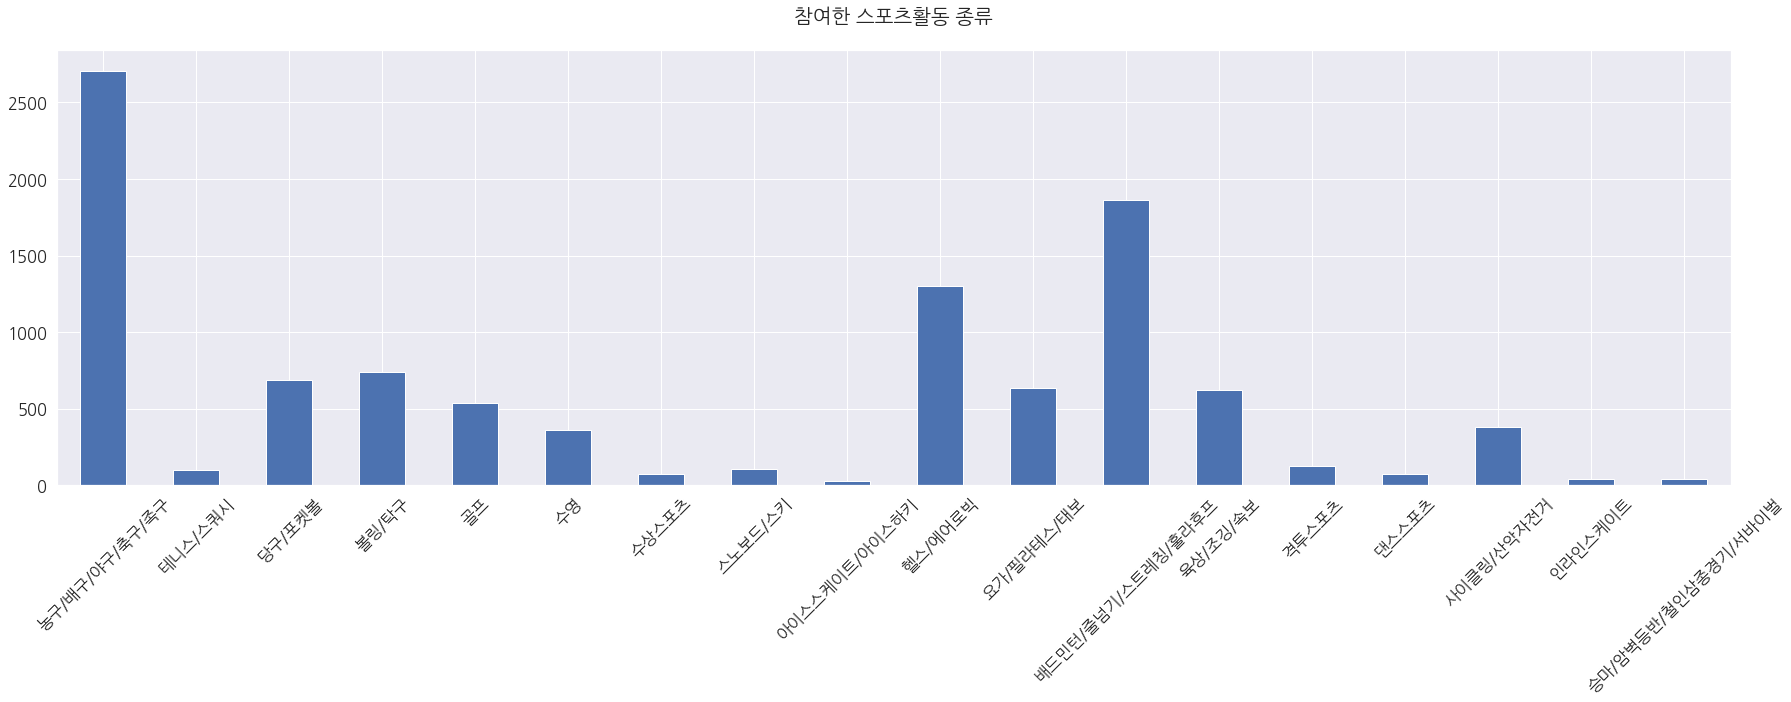

In [9]:
# 스포츠참여활동 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(30, 8))
ax = sports_active.plot(kind = 'bar')
plt.xticks(rotation=45)
ax.set_title('참여한 스포츠활동 종류\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

### 한 번 이상 참여한 여가활동 순위
### 1위 농구/배구/야구/축구/족구 2위 배드민턴/줄넘기/스트레칭/훌라후프 3위 헬스/에어로빅

## 스포츠관람 경험자 분석

In [10]:
# 관람만 한 사람, 참여만 한 사람 추출
watch_null = sports_exp_df['q1_C'].isin(['99'])
active_null = sports_exp_df['q1_D'].isin(['99'])

only_watch = sports_exp_df[~watch_null]
only_active = sports_exp_df[~active_null]
print(only_watch.shape, only_active.shape)

(5018, 55) (5061, 55)


In [11]:
# 스포츠관람만 한 사람의 성별 비중
print('레이블 설명')
print('1: 남성, 2: 여성')
print('\n')
for i, col in enumerate(sports_watch_col):
    print(sports_watch.index[i],'성별 비중')
    print(only_watch[[col, 'DM1']].value_counts())
    print('\n')

레이블 설명
1: 남성, 2: 여성


경기관람 성별 비중
q1_C  DM1
16    1      447
      2      141
dtype: int64


간접관람 성별 비중
q1_C_m2  DM1
17       1      3194
         2      1548
dtype: int64


격투관람 성별 비중
q1_C_m3  DM1
18       1      266
         2       41
dtype: int64


이스포츠 성별 비중
q1_C_m4  DM1
19       1      307
         2       67
dtype: int64




In [12]:
# 스포츠관람만 한 사람의 연령별 비중
print('레이블 설명')
print('1: 15~19세, 2: 20대, 3:30대, 4: 40대, 5: 50대, 6: 60대, 7:70세 이상')
print('\n')
for i, col in enumerate(sports_watch_col):
    print(sports_watch.index[i],'연령별 비중')
    print(only_watch[[col, 'DM2']].value_counts(sort = False))
    print('\n')

레이블 설명
1: 15~19세, 2: 20대, 3:30대, 4: 40대, 5: 50대, 6: 60대, 7:70세 이상


경기관람 연령별 비중
q1_C  DM2
16    1       52
      2      142
      3      120
      4      104
      5      107
      6       46
      7       17
dtype: int64


간접관람 연령별 비중
q1_C_m2  DM2
17       1      271
         2      726
         3      766
         4      922
         5      957
         6      666
         7      434
dtype: int64


격투관람 연령별 비중
q1_C_m3  DM2
18       1      32
         2      61
         3      49
         4      63
         5      56
         6      33
         7      13
dtype: int64


이스포츠 연령별 비중
q1_C_m4  DM2
19       1       52
         2      164
         3       70
         4       51
         5       28
         6        9
dtype: int64




In [13]:
print('성별/연령대별 직접관람 비중')
print(only_watch[['q1_C', 'DM1', 'DM2']].value_counts(sort = False))

# 남성 20대, 30대 비중이 가장 크고, 40대 50대가 그 다음으로 높음
# 여성의 경우 20대 비중이 가장 크며, 그 다음으로 50대가 높음 -> 중년부부의 동반관람이 조금 있는듯

성별/연령대별 직접관람 비중
q1_C  DM1  DM2
16    1    1       39
           2      102
           3       92
           4       85
           5       76
           6       38
           7       15
      2    1       13
           2       40
           3       28
           4       19
           5       31
           6        8
           7        2
dtype: int64


In [14]:
print('성별/연령대별 간접관람 비중')
print(only_watch[['q1_C_m2', 'DM1', 'DM2']].value_counts(sort = False))

# 남성 40-50대의 비중이 20-30대보다 큼
# 여성 40-50대의 비중이 20-30대보다 큼
# 간접관람을 선호하는 40-50대, 그 이유는 무엇일까? + 그 이유를 보완한다면, 간접관람을 직접관람 수요로 돌릴 수 있지 않을까?

성별/연령대별 간접관람 비중
q1_C_m2  DM1  DM2
17       1    1      190
              2      498
              3      529
              4      599
              5      635
              6      465
              7      278
         2    1       81
              2      228
              3      237
              4      323
              5      322
              6      201
              7      156
dtype: int64


In [15]:
print('1: 100만원 미만, 2: 100~200만원, 3: 200~300만원, 4: 300~400만원, 5: 400~500만원, 6: 500~600만원, 7: 600만원 이상, 9: 무응답')
print(only_watch[['q1_C', 'DM8']].value_counts(sort = False))

# 소득격차가 직접관람에 영향을 크게 미침을 확인
# 월 300만원 이상 소득인 가구부터 직접 관람을 많이 하며, 월 600만원 이상의 고소득 가구는 더 여유롭게 직관을 자주하는 것으로 보임

1: 100만원 미만, 2: 100~200만원, 3: 200~300만원, 4: 300~400만원, 5: 400~500만원, 6: 500~600만원, 7: 600만원 이상, 9: 무응답
q1_C  DM8
16    1       21
      2       29
      3       68
      4      111
      5      109
      6      104
      7      146
dtype: int64


In [16]:
print('1: 100만원 미만, 2: 100~200만원, 3: 200~300만원, 4: 300~400만원, 5: 400~500만원, 6: 500~600만원, 7: 600만원 이상, 9: 무응답')
print(only_watch[['q1_C_m2', 'DM8']].value_counts(sort = False))

# 월 200만원 미만의 소득을 갖는 가구는 간접관람 경험도 적음
# 상대적으로 소득이 적은 가구는 스포츠 관람에 여유를 갖기 힘들수도 있으나 인과관계는 불분명
# 학생 1인가구

1: 100만원 미만, 2: 100~200만원, 3: 200~300만원, 4: 300~400만원, 5: 400~500만원, 6: 500~600만원, 7: 600만원 이상, 9: 무응답
q1_C_m2  DM8
17       1      321
         2      411
         3      701
         4      954
         5      810
         6      657
         7      888
dtype: int64


## 하지만 위의 지표가 지난 1년간 참여/관람한 횟수이므로 지속적인 여가를 즐겼다는 지표로 보기는 어려움
### 따라서, 스포츠 관련 여가활동의 지속 여부를 확인할 필요가 있음
##

### '스포츠인'이라는 용어 새롭게 정의
### 스포츠인: 지난 1년간 지속적으로 스포츠관람 혹은 스포츠활동에 직접 참여한 사람이라고 응답한 자
##

In [17]:
# 변수명 Q6: 스포츠인 여부 (라벨 16~37까지가 스포츠 관련 라벨)
q6_na = sports_exp_df['q6'].isin(["99"])
sportsman = sports_exp_df[~q6_na]
sportsman

,q1_C,q1_C_m2,q1_C_m3,q1_C_m4,q1_D,q1_D_m2,q1_D_m3,q1_D_m4,q1_D_m5,q1_D_m6,...,DM3,DM4,DM5,DM6,DM7,DM8,DM9,DM10,DM11,DM12
4,<NA>,17,<NA>,<NA>,99,<NA>,<NA>,<NA>,<NA>,<NA>,...,3,2,1,1,5,2,3,5,15,3
5,<NA>,17,<NA>,<NA>,99,<NA>,<NA>,<NA>,<NA>,<NA>,...,1,2,3,1,5,2,3,5,15,3
6,<NA>,17,<NA>,<NA>,99,<NA>,<NA>,<NA>,<NA>,<NA>,...,2,3,2,1,5,3,3,5,15,3
8,99,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,1,1,3,1,8,1,3,5,15,3
9,<NA>,17,<NA>,<NA>,<NA>,<NA>,22,<NA>,<NA>,<NA>,...,3,2,2,2,6,3,3,5,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10042,<NA>,17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,4,3,2,1,1,7,2,4,14,3
10043,99,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,3,3,1,2,8,4,2,4,14,3
10045,99,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,24,<NA>,...,4,2,2,1,4,7,2,4,14,3
10046,16,17,<NA>,<NA>,20,<NA>,<NA>,<NA>,<NA>,<NA>,...,2,3,1,2,8,7,2,4,14,3


In [18]:
sportsman_count = sportsman['q6'].value_counts(dropna = True)
print('경기관람을 꾸준히 지속하는 사람 빈도')
print(sportsman_count.loc[['16', '17', '18', '19']])
print('꾸준히 스포츠를 관람하며 여가활동을 즐기는 사람 수: ', sportsman_count.loc[['16', '17', '18', '19']].sum())

경기관람을 꾸준히 지속하는 사람 빈도
16    12
17    36
18     2
19     3
Name: q6, dtype: Int64
꾸준히 스포츠를 관람하며 여가활동을 즐기는 사람 수:  53


### 여가활동으로 꾸준히 스포츠를 관람하는 사람은 의외로 굉장히 적은 것으로 나타남
#### 지속적으로 스포츠를 관람한다고 응답한 사람이 이렇게 적은 이유는 아마 스포츠관람 자체를 가장 많이 참여한 여가활동으로 꼽기에는 너무 사소하게 느껴져서 아닐까
##

In [19]:
print('스포츠를 취미로 꾸준히 하는 사람')
sportsman_act_count = sportsman_count.loc[['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']]
sportsman_act_count.index =  ["농구/배구/야구/축구/족구", "테니스/스쿼시", "당구/포켓볼", "볼링/탁구", "골프", "수영", "수상스포츠", "스노보드/스키", "아이스스케이트/아이스하키", "헬스/에어로빅", "요가/필라테스/태보", "배드민턴/줄넘기/스트레칭/훌라후프", "육상/조깅/속보", "격투스포츠", "댄스스포츠",
"사이클링/산악자전거", "인라인스케이트", "승마/암벽등반/철인삼종경기/서바이벌"]
print(sportsman_act_count)
print('\n')
print('꾸준히 스포츠에 참여하며 여가활동을 즐기는 사람 수: ', sportsman_act_count.sum())

스포츠를 취미로 꾸준히 하는 사람
농구/배구/야구/축구/족구         187
테니스/스쿼시                 23
당구/포켓볼                  30
볼링/탁구                   66
골프                     172
수영                      75
수상스포츠                   12
스노보드/스키                  3
아이스스케이트/아이스하키            1
헬스/에어로빅                409
요가/필라테스/태보             195
배드민턴/줄넘기/스트레칭/훌라후프     129
육상/조깅/속보                58
격투스포츠                   33
댄스스포츠                   16
사이클링/산악자전거             112
인라인스케이트                  2
승마/암벽등반/철인삼종경기/서바이벌      5
Name: q6, dtype: Int64


꾸준히 스포츠에 참여하며 여가활동을 즐기는 사람 수:  1528


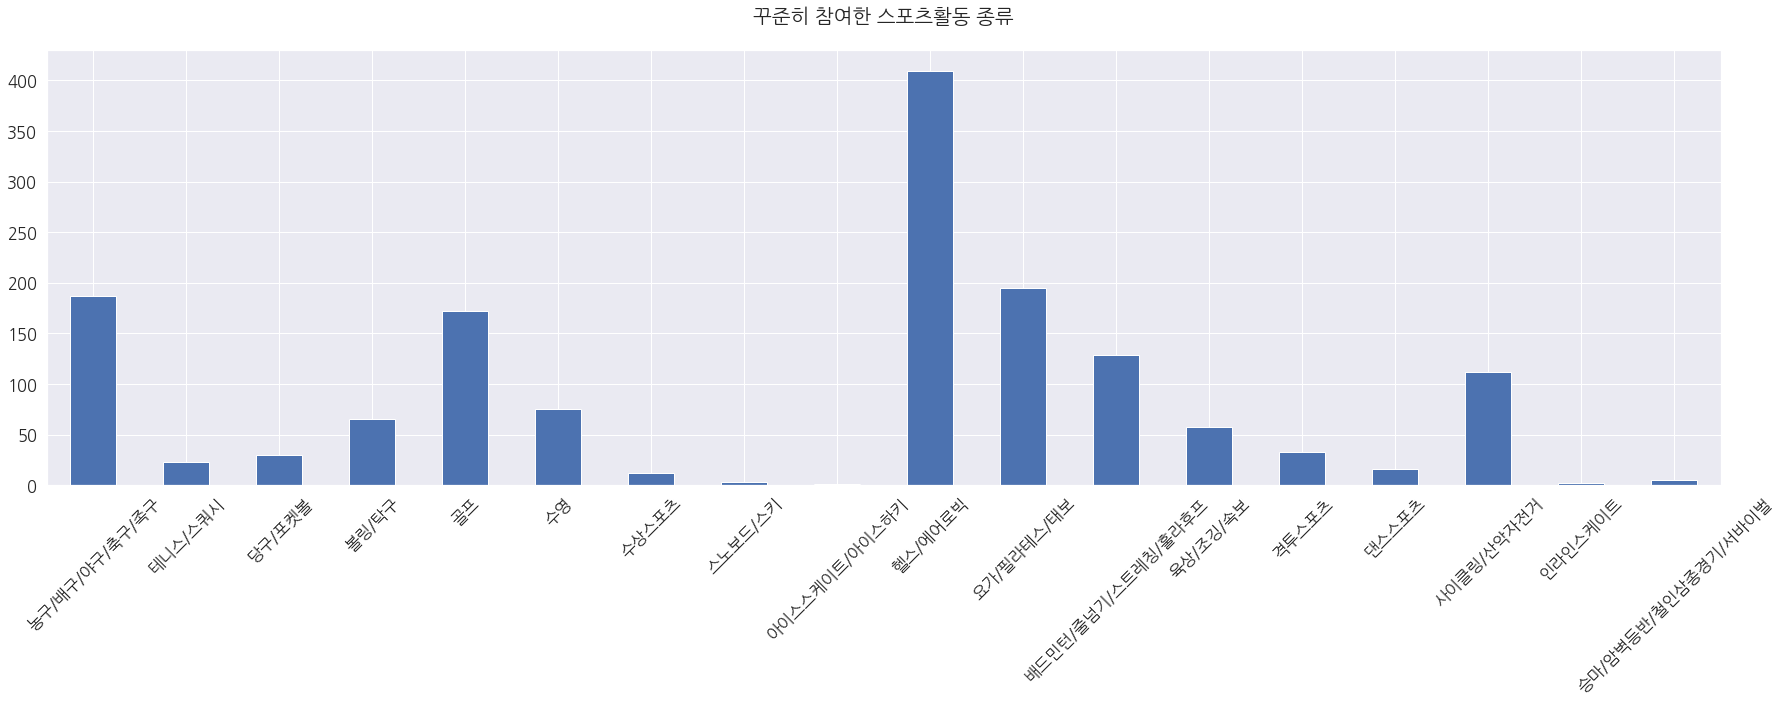

In [20]:
# 꾸준한 스포츠활동참여 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (30, 8))
ax = sportsman_act_count.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('꾸준히 참여한 스포츠활동 종류\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

### 꾸준한 여가생활로 선호하는 스포츠활동 순위
### 1위 헬스/에어로빅 2위 요가/필라테스/태보 3위 농구/배구/야구/축구/족구

## 스포츠 관람, 스포츠 활동을 꾸준히 하는 사람들의 월 평균 지출

In [21]:
# 꾸준한 직관러들의 소비금액 요약
sportsman.loc[sportsman['q6'] == '16', 'q9'].describe().round()

count        12.0
mean     172500.0
std      123518.0
min       50000.0
25%       65000.0
50%      125000.0
75%      300000.0
max      400000.0
Name: q9, dtype: float64

In [22]:
# 꾸준한 간접관람객들의 소비금액 요약
sportsman.loc[sportsman['q6'] == '17', 'q9'].describe().round()

count        36.0
mean     121694.0
std       88024.0
min        3000.0
25%       50000.0
50%      100000.0
75%      162500.0
max      350000.0
Name: q9, dtype: float64

In [23]:
# 스포츠 활동러들 행 추출

sportsman_act_index = sportsman['q6'].isin(['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37'])
sportsman_act = sportsman[sportsman_act_index]

In [24]:
## 고비용 스포츠

print('골프')
print(sportsman_act.loc[sportsman_act['q6'] == '24', 'q9'].describe().round())
print('\n')

print('윈드서핑, 수상스키, 스킨스쿠버, 래프팅, 요트')
print(sportsman_act.loc[sportsman_act['q6'] == '26', 'q9'].describe().round())

print('\n')
print('승마, 암벽등반, 철인삼종경기, 서바이벌')
print(sportsman_act.loc[sportsman_act['q6'] == '37', 'q9'].describe().round())

골프
count        172.0
mean      487442.0
std       456797.0
min        20000.0
25%       200000.0
50%       325000.0
75%       500000.0
max      3000000.0
Name: q9, dtype: float64


윈드서핑, 수상스키, 스킨스쿠버, 래프팅, 요트
count         12.0
mean      400000.0
std       329600.0
min        50000.0
25%       200000.0
50%       300000.0
75%       600000.0
max      1000000.0
Name: q9, dtype: float64


승마, 암벽등반, 철인삼종경기, 서바이벌
count          5.0
mean      400000.0
std       344601.0
min       150000.0
25%       200000.0
50%       300000.0
75%       350000.0
max      1000000.0
Name: q9, dtype: float64


In [25]:
# 선호도가 높은 스포츠

print('축구/배구/농구/야구/족구')
print(sportsman_act.loc[sportsman_act['q6'] == '20', 'q9'].describe().round())

print('\n')
print('헬스/에어로빅')
print(sportsman_act.loc[sportsman_act['q6'] == '29', 'q9'].describe().round())

print('\n')
print('요가/필라테스')
print(sportsman_act.loc[sportsman_act['q6'] == '30', 'q9'].describe().round())

축구/배구/농구/야구/족구
count        187.0
mean      187807.0
std       190297.0
min            0.0
25%        50000.0
50%       100000.0
75%       275000.0
max      1000000.0
Name: q9, dtype: float64


헬스/에어로빅
count        409.0
mean      218456.0
std       186431.0
min            0.0
25%       100000.0
50%       200000.0
75%       300000.0
max      2000000.0
Name: q9, dtype: float64


요가/필라테스
count        195.0
mean      214641.0
std       174651.0
min            0.0
25%       100000.0
50%       200000.0
75%       275000.0
max      1000000.0
Name: q9, dtype: float64


## 평일, 휴일 참여 희망 스포츠

### '스포츠경험자'와 '스포츠비경험자'라는 새로운 용어 정의
### 스포츠경험자: 1년 내에 1회 이상 스포츠관람/참여활동을 한 경험이 있는 사람
### 스포츠비경험자: 1년 내에 스포츠관람/참여활동을 한번도 경험한 적 없는 사람

In [26]:
# 데이터 수
num_whole = h21.shape[0] # 전체 응답자 수
num_sport = sports_exp_df.shape[0] # 스포츠경험자 수
num_nonsport = num_whole - num_sport # 스포츠비경험자 수

In [27]:
# 평일 희망 관람 활동
print(h21['q11_1_C'].value_counts()) # 전체 응답자 중 평일에 스포츠 관람을 희망한고 응답한 사람
print('\n')
print(sports_exp_df['q11_1_C'].value_counts() / num_sport * 100) # 스포츠경험자 중 평일에 스포츠 관람을 희망한고 응답한 사람
print('\n')
print((h21['q11_1_C'].value_counts() - sports_exp_df['q11_1_C'].value_counts()) / num_nonsport * 100)

# 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
# 스포츠비경험자는 스포츠 관람 희망 비율이 0.2%, 비희망 비율이 99.8%

98    5651
17    4140
19     139
16      92
18      27
Name: q11_1_C, dtype: int64


17    60.577205
98    35.657779
19     2.036332
16     1.333138
18     0.395546
Name: q11_1_C, dtype: Float64


16     0.031027
17     0.155135
18          0.0
19          0.0
98    99.813838
Name: q11_1_C, dtype: Float64


### 스포츠경험자는 평일 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
### 스포츠비경험자는 평일 스포츠 관람 희망 비율이 0.2%, 비희망 비율이 99.8%

In [28]:
# 휴일 희망 관람 활동
print(h21['q12_1_C'].value_counts()) # for 전체 응답자
print('\n')
print(sports_exp_df['q12_1_C'].value_counts() / num_sport * 100) # 스포츠경험자의 비율
print('\n')
print((h21['q12_1_C'].value_counts() - sports_exp_df['q12_1_C'].value_counts()) / num_nonsport * 100) # 스포츠비경험자의 비율

# 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
# 스포츠비경험자는 스포츠 관람 희망 비율이 0.3%, 비희망 비율이 99.7%

98    5640
17    3923
16     255
19     174
18      57
Name: q12_1_C, dtype: int64


17    57.354234
98     35.54058
16     3.721067
19     2.549077
18     0.835042
Name: q12_1_C, dtype: Float64


16     0.031027
17     0.248216
18          0.0
19          0.0
98    99.720757
Name: q12_1_C, dtype: Float64


### 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
### 스포츠비경험자는 스포츠 관람 희망 비율이 0.3%, 비희망 비율이 99.7%
###

## 결론 1. 스포츠경험자와 스포츠비경험자 간 스포츠 관람 의사가 매우 크게 차이남
###

## 평일/휴일 직접 참여 희망 스포츠

In [29]:
# 평일 참여 희망 스포츠

print(h21['q11_3_D'].value_counts()) # 전체 응답자
print('\n')
print(round((sports_exp_df['q11_3_D'].value_counts() / num_sport * 100), 2)) # 스포츠경험자
print('\n')
print(round(((h21['q11_3_D'].value_counts() - sports_exp_df['q11_3_D'].value_counts()) / num_nonsport * 100), 2).sort_values(ascending = False))

# 스포츠경험자 중 22%는 스포츠활동을 희망하지 않음, 14%는 헬스, 13%는 배드민턴/스트레칭/줄넘기 10%는 요가/필라테스, 7%는 축/배/야/농/족구, 6%는 골프, 5% 볼링/탁구 & 수영
# 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31, 요가/필라테스 30) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯

# 스포츠비경험자 중 66%는 스포츠활동을 희망하지 않음, 11%는 요가/필라테스, 7%는 수영, 5%는 헬스 순으로 희망
# 스포츠비경험자는 건강을 위한 스포츠 위주로 희망

98    3608
29    1118
30    1061
31     992
25     585
20     479
24     431
23     409
22     373
32     247
35     221
34     145
21      81
37      79
26      77
33      75
27      39
36      19
28      10
Name: q11_3_D, dtype: int64


98    21.92
29    13.92
31    13.23
30    10.24
20     6.56
24     5.89
23     5.32
25     5.26
22     5.02
32     3.27
35     2.92
34     1.52
33     1.04
21     1.03
26      1.0
37     0.98
27     0.51
36     0.25
28     0.13
Name: q11_3_D, dtype: Float64


98    65.53
30    11.23
25     7.01
29     5.21
31     2.76
23     1.43
34     1.27
20     0.96
22     0.93
24      0.9
32     0.74
35     0.68
37     0.37
21     0.34
26     0.28
27     0.12
33     0.12
36     0.06
28     0.03
Name: q11_3_D, dtype: Float64


#### 스포츠경험자 중 22%는 스포츠활동을 희망하지 않음, 14%는 헬스, 13%는 배드민턴/스트레칭/줄넘기 10%는 요가/필라테스, 7%는 축/배/야/농/족구, 6%는 골프, 5% 볼링/탁구 & 수영
#### 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31, 요가/필라테스 30) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯
####

#### 스포츠비경험자 중 66%는 스포츠활동을 희망하지 않음, 11%는 요가/필라테스, 7%는 수영, 5%는 헬스 순으로 희망
#### 스포츠비경험자는 건강을 위한 스포츠 위주로 희망
##

In [30]:
# 휴일 참여 희망 스포츠

print(h21['q12_3_D'].value_counts()) # 전체 응답자
print('\n')
print(round((sports_exp_df['q12_3_D'].value_counts() / num_sport * 100), 2)) # 스포츠경험자
print('\n')
print(round(((h21['q12_3_D'].value_counts() - sports_exp_df['q12_3_D'].value_counts()) / num_nonsport * 100), 2).sort_values(ascending = False))

# 스포츠경험자 중 24%는 스포츠활동을 희망하지 않음, 13%는 배드민턴/스트레칭/줄넘기, 8%는 헬스, 8% 골프, 8% 요가/필라테스, 7% 축배야농족구 6% 볼링/탁구 희망
# 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯

# 스포츠비경험자 중 67%는 스포츠활동을 희망하지 않음, 9%는 요가/필라테스, 6%는 수영, 4%는 헬스 3%는 배드민턴/줄넘기/스트레칭 순으로 희망
# 스포츠비경험자는 건강을 위한 스포츠(요가/필라테스 30, 수영, 25, 헬스 29, 스트레칭/줄넘기 31) 위주로 희망

# 휴일에는 스포츠경험자의 헬스의 선호도가 약 6% 가량 낮아진다는 점이 눈에 띔
# 골프와 사이클의 비중이 높아짐 

98    3798
31     970
30     835
29     679
24     608
25     522
20     519
23     463
35     395
22     371
32     265
34     152
26     111
37      88
27      86
21      84
33      55
36      34
28      14
Name: q12_3_D, dtype: int64


98    24.17
31    12.82
29     8.13
24     8.09
30     7.93
20     7.08
23     5.93
35     5.17
22     4.95
25     4.78
32     3.47
34     1.57
26     1.33
37     1.11
27     1.07
21     1.03
33     0.73
36     0.45
28     0.19
Name: q12_3_D, dtype: Float64


98    66.65
30     9.12
25     6.08
29     3.85
31     2.95
23      1.8
24     1.74
34      1.4
35      1.3
20     1.12
22     1.02
32     0.87
26     0.62
21     0.43
27      0.4
37     0.37
33     0.16
36     0.09
28     0.03
Name: q12_3_D, dtype: Float64


#### 스포츠경험자 중 24%는 스포츠활동을 희망하지 않음
#### 13%는 배드민턴/스트레칭/줄넘기, 8%는 헬스, 8% 골프, 8% 요가/필라테스, 7% 축배야농족구 6% 볼링/탁구 희망
#### 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯
####

#### 스포츠비경험자 중 67%는 스포츠활동을 희망하지 않음
#### 9%는 요가/필라테스, 6%는 수영, 4%는 헬스 3%는 배드민턴/줄넘기/스트레칭 순으로 희망
#### 스포츠비경험자는 건강을 위한 스포츠(요가/필라테스 30, 수영, 25, 헬스 29, 스트레칭/줄넘기 31) 위주로 희망

####
#### 휴일에는 스포츠경험자의 헬스의 선호도가 약 6% 가량 낮아진다는 점이 눈에 띔
#### 휴일에 골프와 사이클을 선호하는 비중이 약 5% 높아짐
####


In [31]:
# 평일/휴일 간 선호 스포츠 차이 비교 시각화 준비
weekday_hope_sport = round((sports_exp_df['q11_3_D'].value_counts() / num_sport * 100), 2) # 스포츠경험자 평일
weekend_hope_sport = round((sports_exp_df['q12_3_D'].value_counts() / num_sport * 100), 2) # 스포츠경험자 휴일

weekday_hope_sport.index = ['원치않음', '헬스', '배드민턴/줄넘기/스트레칭', '요가/필라테스', '구기5종', '골프', '볼링/탁구', '수영', '당구/포켓볼', '육상/조깅', '사이클', '댄스스포츠', '격투기', '테니스/스쿼시', '수상스포츠', '승마/클라이밍', '스노보드/스키', '인라인', '아이스스케이트']
weekend_hope_sport.index = ['원치않음', '배드민턴/줄넘기/스트레칭', '헬스', '골프', '요가/필라테스', '구기5종', '볼링/탁구', '사이클', '당구/포켓볼', '수영', '육상/조깅', '댄스스포츠', '수상스포츠', '승마/클라이밍', '스노보드/스키', '테니스/스쿼시', '격투기', '인라인', '아이스스케이트']

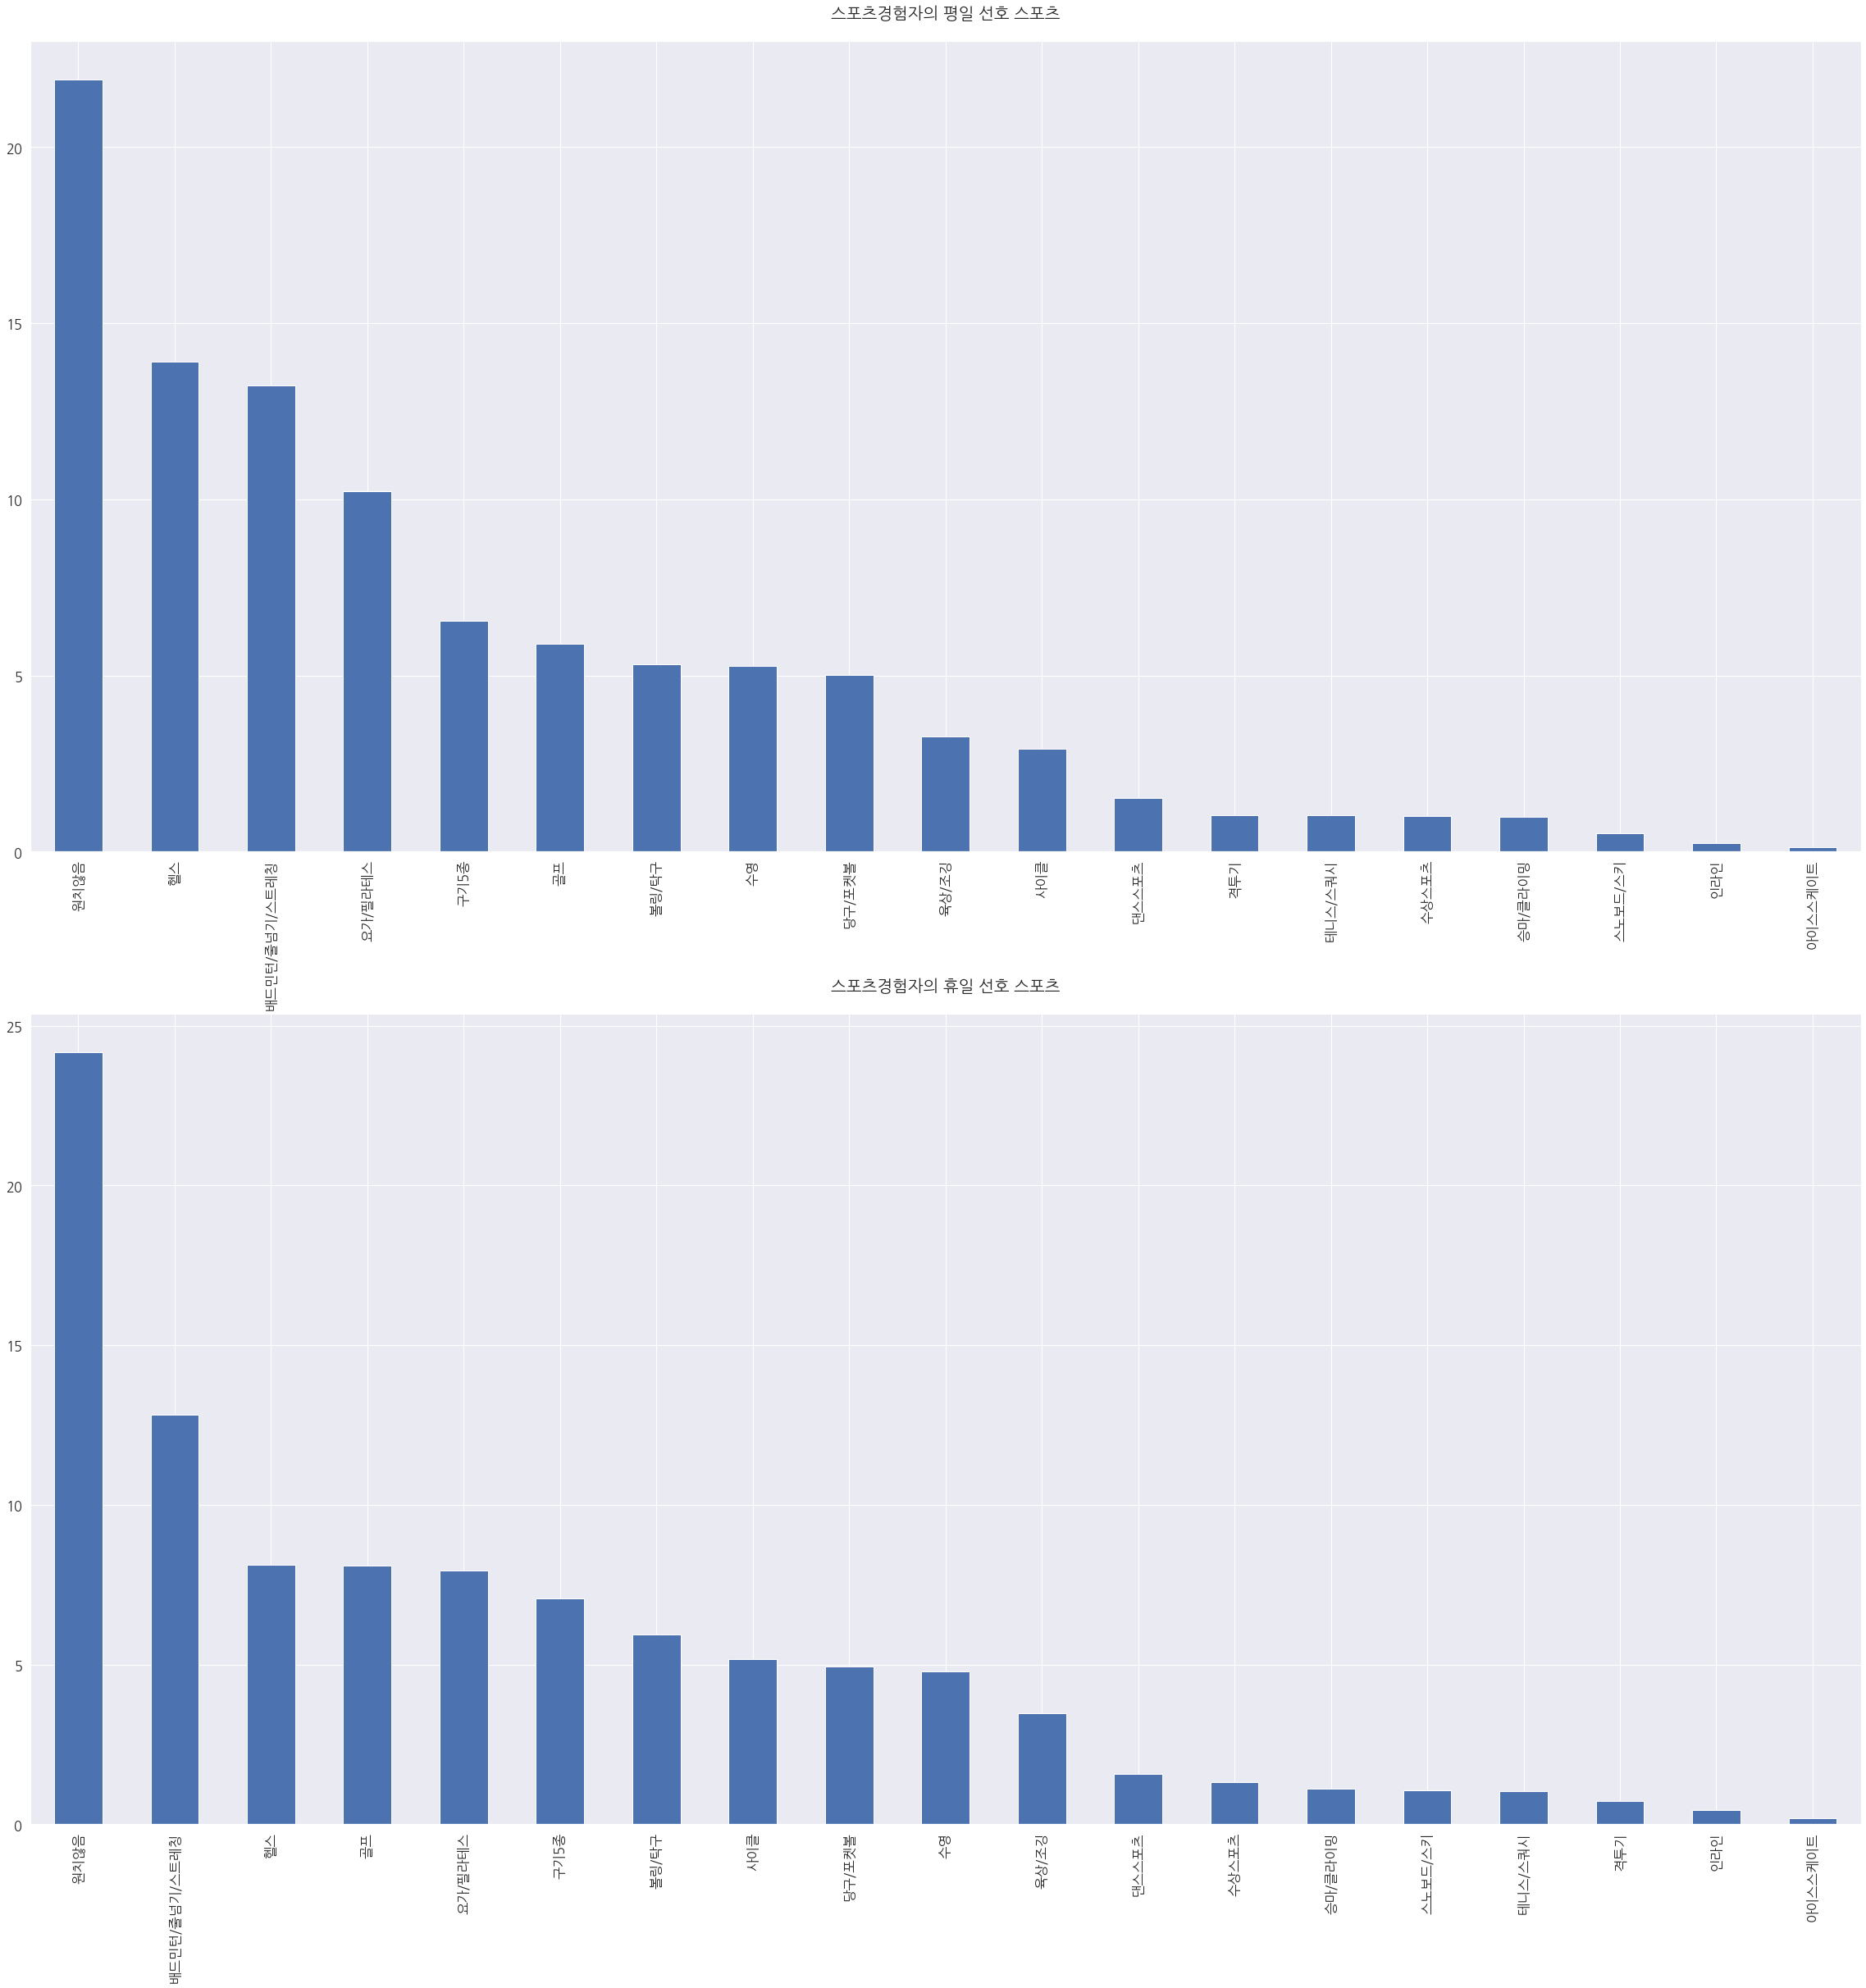

In [32]:
# 평일/휴일 간 선호 스포츠 차이 비교 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
f, ax = plt.subplots(2, 1, figsize = (40, 40))
weekday_hope_sport.plot(kind = 'bar', ax = ax[0])
weekend_hope_sport.plot(kind = 'bar', ax = ax[1])
ax[0].set_title('스포츠경험자의 평일 선호 스포츠\n', fontsize = 20)
ax[1].set_title('스포츠경험자의 휴일 선호 스포츠\n', fontsize = 20)
ax[0].set_xlabel('');  # semicolon suppresses text output
ax[1].set_xlabel('');  # semicolon suppresses text output

## 결론 2. 스포츠경험자와 스포츠비경험자 간의 스포츠 활동 참여의사도 크게 차이남
### 스포츠경험자는 건강 관련 스포츠 혹은 꾸준히 활동하는 사람이 많은 스포츠를 선호
### 스포츠비경험자는 건강 관련 스포츠 선호
### 스포츠경험자 중 평일에 헬스를 희망하는 비율이 휴일에 헬스를 희망하는 비율보다 6% 더 높음 (차이가 제법 남)
### 스포츠경험자 중 휴일에 사이클/골프를 희망하는 비율이 휴일에 사이클/골프를 희망하는 비율보다 5% 가량 더 높음

##

### 생각해볼점:
### 1. 스포츠경험자와 스포츠인의 인구통계적 특성 혹은 경험을 비교하고, 스포츠경험자가 소비능력이 높은 스포츠인이 되도록 유도?
### 2. 스포츠경험자의 인구통계적 특성을 확인하고, 해당 인구통계적 특성을 갖는 사람에게 스포츠활동 추천?
### 3. 스포츠비경험자에게 한번이라도 스포츠관련 경험을 유도한다면, 스포츠관람/활동에 대한 선호가 높아질 수도 있을 것